<a href="https://colab.research.google.com/github/johnprasanth93/RIC_Anomaly_Detection/blob/main/RIC_Anomaly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D,Dropout,Dense,Flatten,TimeDistributed,Conv2D,GlobalAveragePooling2D,MaxPool2D

In [5]:
!pip install keras-video-generators

In [6]:
import keras_video

In [7]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


## Basic Model Implementation

In [ ]:
model = Sequential([
      TimeDistributed(Conv2D(16,(3,3),input_shape=(seq_len,img_height,img_width,3),activation='relu')),
      TimeDistributed(MaxPool2D()),
      TimeDistributed(Conv2D(32,(3,3),input_shape=(seq_len,img_height,img_width,3),activation='relu')),
      TimeDistributed(MaxPool2D()),
      TimeDistributed(GlobalAveragePooling2D()),
      Dense(512,activation='relu'),
      Dropout(0.2),
      Dense(1,activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, epochs=40,batch_size=8,
                    validation_data=(X_test,y_test))

Epoch 1/40
4/4 [==============================] - 3s 650ms/step - loss: 0.8888 - accuracy: 0.6431 - val_loss: 1.1272 - val_accuracy: 0.4615
Epoch 2/40
4/4 [==============================] - 2s 533ms/step - loss: 0.6594 - accuracy: 0.6661 - val_loss: 0.5919 - val_accuracy: 0.6981
Epoch 3/40
4/4 [==============================] - 2s 543ms/step - loss: 0.5425 - accuracy: 0.7330 - val_loss: 0.7857 - val_accuracy: 0.6154
Epoch 4/40
4/4 [==============================] - 2s 611ms/step - loss: 0.4933 - accuracy: 0.7161 - val_loss: 0.6961 - val_accuracy: 0.6154
Epoch 5/40
4/4 [==============================] - 2s 559ms/step - loss: 0.5120 - accuracy: 0.7434 - val_loss: 0.7825 - val_accuracy: 0.6154
Epoch 6/40
4/4 [==============================] - 2s 573ms/step - loss: 0.5065 - accuracy: 0.7210 - val_loss: 0.7911 - val_accuracy: 0.6154
Epoch 7/40
4/4 [==============================] - 2s 611ms/step - loss: 0.4081 - accuracy: 0.7989 - val_loss: 0.5910 - val_accuracy: 0.6872
Epoch 8/40
4/4 [====

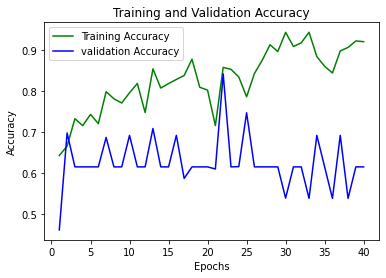

In [ ]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (seq_len,img_width, img_height,3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 198, 298, 16)      11008     
_________________________________________________________________
dropout_8 (Dropout)          (None, 198, 298, 16)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 944064)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               120840320 
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 120,851,457
Trainable params: 120,851,457
Non-trainable params: 0
________________________________________

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=15,batch_size=2)

Epoch 1/15


ResourceExhaustedError: ignored

## New Implementation to extract frames in optimised way to avoid OOM error

In [20]:
src_train_data_dir = '/gdrive/My Drive/Anomaly_Dataset/train'
src_test_data_dir = '/gdrive/My Drive/Anomaly_Dataset/test'

img_height , img_width = 244, 244
seq_len = 30
batch_size = 1
channels = 3
 
classes = ["Anomaly","Normal"]


In [ ]:
src_train_data_dir = '/gdrive/My Drive/Anomaly_Dataset/train'
src_test_data_dir = '/gdrive/My Drive/Anomaly_Dataset/test'

img_height , img_width = 244, 244
seq_len = 30
batch_size = 1
channels = 3
 
classes = ["Anomaly","Normal"]
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    #rotation_range=8,
    #width_shift_range=.2,
    #height_shift_range=.2,
    rescale=1/255.)

In [ ]:
src_train_data_dir = '/gdrive/My Drive/Anomaly_Dataset/train'
src_test_data_dir = '/gdrive/My Drive/Anomaly_Dataset/test'

img_height , img_width = 244, 244
seq_len = 30
batch_size = 1
channels = 3
 
classes = ["Anomaly","Normal"]
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    #rotation_range=8,
    #width_shift_range=.2,
    #height_shift_range=.2,
    rescale=1/255.)
frame_gen = keras_video.SlidingFrameGenerator(
    #sequence_time=10, 
    batch_size=batch_size, nb_frames=seq_len, glob_pattern=src_train_data_dir+'/{classname}/*', 
    split_val=.2,
    #rescale=1/255.,
    target_shape = (img_width,img_height),
    nb_channel=channels,
    transformation=data_aug,
    shuffle=True,
    use_frame_cache = False)


class Anomaly, validation count: 3, train count: 13
class Normal, validation count: 2, train count: 11
Total data: 2 classes for 24 files for train
Checking files to find possible sequences, please wait...
For 24 files, I found 744 possible sequence samples


In [ ]:
val_gen = frame_gen.get_validation_generator()

Total data: 2 classes for 5 files for validation
Checking files to find possible sequences, please wait...
For 5 files, I found 155 possible sequence samples


In [ ]:
from keras_video import utils as video_utils

In [ ]:
print(len(frame_gen))

744


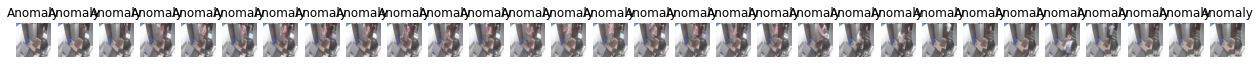

In [ ]:
video_utils.show_sample(frame_gen,random=True)

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (seq_len,img_height,img_width,3)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 242, 242, 16)      11008     
_________________________________________________________________
flatten (Flatten)            (None, 937024)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               479756800 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 479,768,834
Trainable params: 479,768,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [ ]:
history = model.fit_generator(frame_gen,
          #steps_per_epoch=300,
          validation_data=val_gen,
          #validation_steps=100,
          epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
744/744 [==============================] - 1661s 2s/step - loss: 7.2254 - accuracy: 0.7890 - val_loss: 1.1851 - val_accuracy: 0.6000
Epoch 2/5
744/744 [==============================] - 1616s 2s/step - loss: 0.6017 - accuracy: 0.9220 - val_loss: 5.9386 - val_accuracy: 0.8000
Epoch 3/5
744/744 [==============================] - 1699s 2s/step - loss: 3.7597 - accuracy: 0.8629 - val_loss: 12.7118 - val_accuracy: 0.6000
Epoch 4/5
744/744 [==============================] - 1744s 2s/step - loss: 0.4714 - accuracy: 0.9731 - val_loss: 1.5858 - val_accuracy: 0.4000
Epoch 5/5
744/744 [==============================] - 1756s 2s/step - loss: 0.9439 - accuracy: 0.9610 - val_loss: 6.1602 - val_accuracy: 0.8000


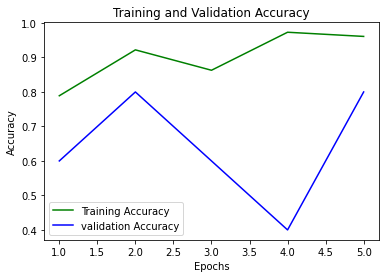

In [ ]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
a = []
while(1):
  a.append('12345')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  | Proc size: 111.6 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [8]:
import keras_video
src_train_data_dir = '/gdrive/My Drive/Anomaly_Dataset/train'
src_test_data_dir = '/gdrive/My Drive/Anomaly_Dataset/test'

img_height , img_width = 124, 124
seq_len = 8
batch_size = 4
channels = 3
 
classes = ["Anomaly","Normal"]
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    #rotation_range=8,
    #width_shift_range=.2,
    #height_shift_range=.2,
    rescale=1/255.)
frame_gen = keras_video.SlidingFrameGenerator(
    #sequence_time=10, 
    batch_size=batch_size, nb_frames=seq_len, glob_pattern=src_train_data_dir+'/{classname}/*', 
    split_val=.2,
    #rescale=1/255.,
    target_shape = (img_width,img_height),
    nb_channel=channels,
    transformation=data_aug,
    shuffle=True,
    use_frame_cache = False)

val_gen = frame_gen.get_validation_generator()


class Anomaly, validation count: 3, train count: 13
class Normal, validation count: 2, train count: 11
Total data: 2 classes for 24 files for train
Checking files to find possible sequences, please wait...
For 24 files, I found 216 possible sequence samples
Total data: 2 classes for 5 files for validation
Checking files to find possible sequences, please wait...
For 5 files, I found 45 possible sequence samples


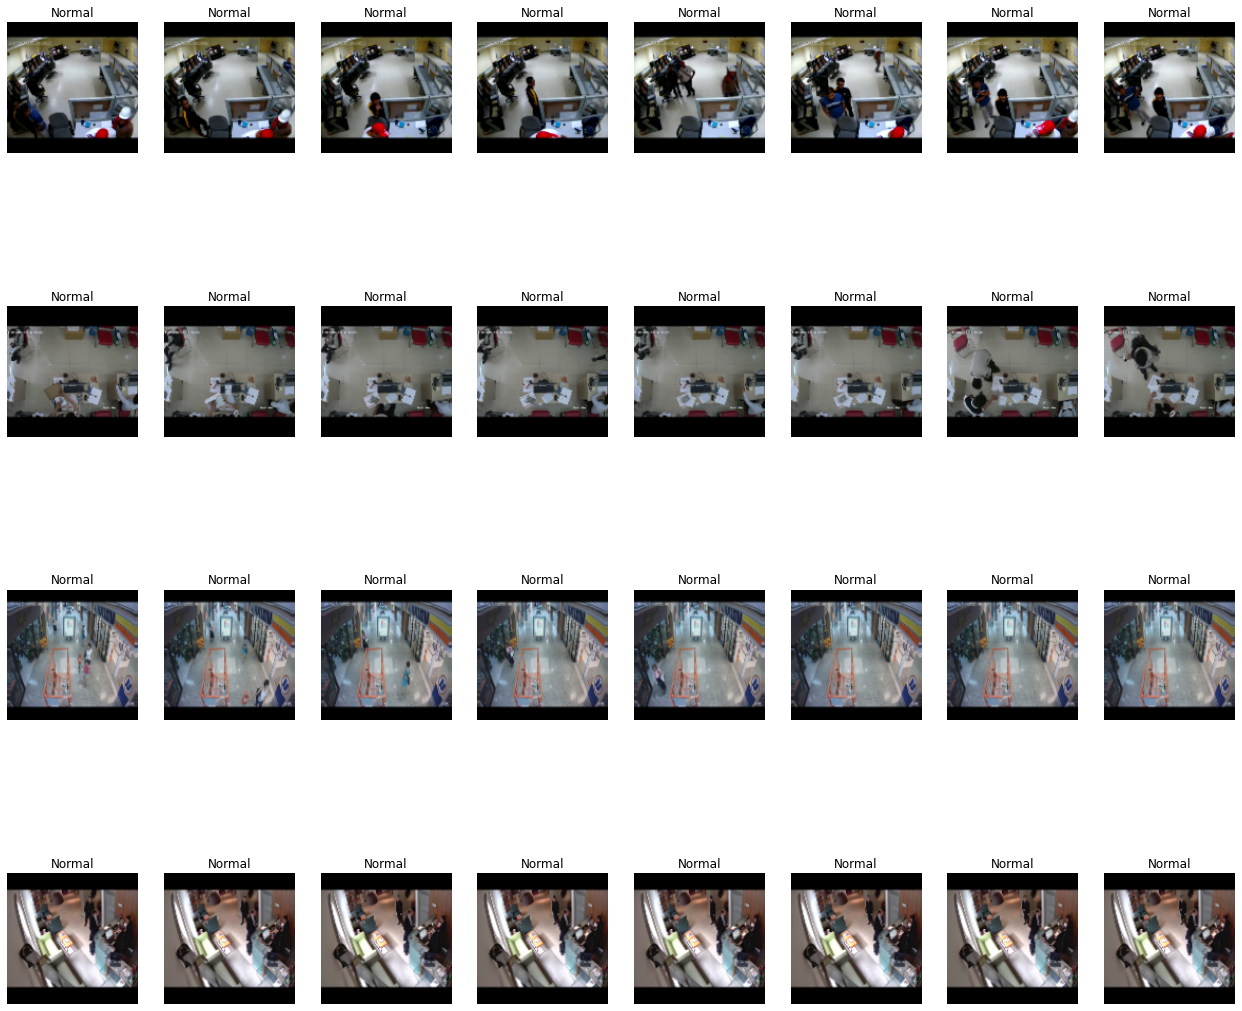

In [9]:
import keras_video.utils
keras_video.utils.show_sample(frame_gen)
#video_utils.show_sample(frame_gen,random=True)

## CapsNet for video processing Implementation

In [29]:
# Squash activation function
def squash(vector, axis=-1, epsilon=1e-5, name='squash_op'):
    with tf.name_scope(name) as scope:
        vec_norm_sq = tf.reduce_sum(
            tf.square(vector), axis=axis, keepdims=True)
        vec_norm = tf.sqrt(vec_norm_sq + epsilon)  #prevents from zero division
        scale = (vec_norm) / (1 + vec_norm)
        squashed_vector = scale * (vector / vec_norm)
        return squashed_vector


In [30]:
def primaryCaps(input,num_caps=32,num_dim=8):
  caps_layer = tf.keras.layers.Conv3D(num_caps*num_dim,(3,3,3), activation='relu',padding='same',name='primary_caps')(input)
  capsule_shape = caps_layer.get_shape().as_list()
  total_num_cap = int((capsule_shape[1] * capsule_shape[2] *
                                 capsule_shape[3] * capsule_shape[4]) / num_dim)
                # for preventing error from getting shape in digit caps. I defined the number of capsules to reshape
  caps_layer = tf.keras.layers.Reshape((total_num_cap,num_dim))(caps_layer)
  caps_layer = squash(caps_layer)
  print(caps_layer)
  return caps_layer



In [31]:
def anomaly_capsule(input_,n_caps=2,d_caps=16,route_iter=3):
  with tf.compat.v1.variable_scope('anomaly_caps_layer') as scope:
    #if reuse == True: scope.reuse_variables()
    #let assume input_: [batch_size, # of capsules, d-capsules]
    #if len(input_shape) ==2 : input_ = tf.expand_dims(input_, axis=-1)
    input_shape = input_.get_shape().as_list()
    initializer=tf.compat.v1.truncated_normal_initializer(stddev=0.02)
    input_tiled = tf.expand_dims(
        input_, axis=-1, name='input_expand_1'
    )  #[batch_size, # of capsule, ..., d-capsules, 1]
    input_tiled = tf.expand_dims(
        input_tiled, axis=2, name='input_expand_2'
    )  #[batch_size, # of capsule, ..., d-capsules, 1]
    print(input_tiled)
    input_tiled = tf.tile(
        input_tiled, [1, 1, n_caps, 1, 1], name='input_tile'
    )  #[batch_size, # of capsule, # of next capsule, d_capsules, 1]
    print(input_tiled)

    W = tf.compat.v1.get_variable(
        'prediction_w', [
            1, input_shape[1], n_caps, d_caps,
            input_shape[2]
        ],
        initializer=initializer)
    W_tiled = tf.tile(W, [batch_size, 1, 1, 1, 1], name='W_tiled')

    prediction_vectors = tf.matmul(W_tiled, input_tiled)

    b = tf.zeros([batch_size, input_shape[1], n_caps, 1, 1])

    for i in range(route_iter):
        coupling_coeff = tf.nn.softmax(b, axis=2)

        s = tf.multiply(
            prediction_vectors,
            coupling_coeff,
            name='weighted_prediction')
        sum_s = tf.reduce_sum(
            s, axis=1, keepdims=True, name='weighted_sum')
        capsules = squash(
            sum_s, axis=-2
        )  #(None, 1, # of nex capsule capsule, d_capsule, 1)
        caps_out_tile = tf.tile(
            capsules, [1, input_shape[1], 1, 1, 1],
            name='capsule_output_tiled')

        a = tf.matmul(
            prediction_vectors,
            caps_out_tile,
            transpose_a=True,
            name='agreement')
        b = tf.add(b, a, name='update_logit')

    capsules = tf.reshape(capsules,
                          [batch_size, n_caps, d_caps])
    print(capsules)
    #return tf.squeeze(capsules)
    return capsules

In [34]:
## Creating a conv3D model

num_caps = 32
num_dim = 8
num_class = 2
num_sec_dim = 16
route_iter = 3
batch_size = 4

input = tf.keras.layers.Input(shape = (8,124,124,3))

conv1 = tf.keras.layers.Conv3D(32,(3,3,3),(1,2,2), activation='relu', padding='same',name='first_conv')(input)

conv2 = tf.keras.layers.Conv3D(64,(3,3,3), activation='relu', padding='same',name='sec_conv')(conv1)

conv3 = tf.keras.layers.Conv3D(64,(3,3,3),(1,2,2), activation='relu', padding='same',name='third_conv')(conv2)

conv4 = tf.keras.layers.Conv3D(128,(3,3,3),(1,2,2), activation='relu',padding='same',name='fourth_conv')(conv3)

print(conv4)
caps_layer = primaryCaps(conv4,num_caps,num_dim)

anomaly_caps_layer = anomaly_capsule(caps_layer,num_class,num_sec_dim,route_iter)

#flatten = layers.Flatten()(caps_layer)

output_layer = tf.sqrt(tf.reduce_sum(tf.square(anomaly_caps_layer), axis=-1)) #[batch_size, num_caps]

output_activation = tf.nn.softmax(output_layer)

pred_label = tf.argmax(output_activation, axis=1)
one_hot_output = tf.one_hot(pred_label, depth=num_class, name='mask_output') #shape = [batch_size, 10]

#output_activation = tf.

print(one_hot_output)

model = tf.keras.models.Model(input,one_hot_output)
model.summary()

Tensor("fourth_conv_5/Relu:0", shape=(None, 8, 16, 16, 128), dtype=float32)
Tensor("squash_op_5/mul:0", shape=(None, 65536, 8), dtype=float32)
Tensor("anomaly_caps_layer_5/input_expand_2:0", shape=(None, 65536, 1, 8, 1), dtype=float32)
Tensor("anomaly_caps_layer_5/input_tile:0", shape=(None, 65536, 2, 8, 1), dtype=float32)
Tensor("anomaly_caps_layer_5/Reshape:0", shape=(4, 2, 16), dtype=float32)
Tensor("mask_output:0", shape=(4, 2), dtype=float32)


FailedPreconditionError: ignored

In [18]:
model.compile(optimizer='Adam',metrics=['Accuracy'],loss='categorical_crossentropy')

In [15]:
import tensorflow as tf


In [ ]:
tf.keras.activations

In [19]:
history = model.fit(frame_gen,epochs=5)

Epoch 1/5
 4/54 [=>............................] - ETA: 1:43 - loss: 0.6834 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [40]:
label_arr = [[]]
for img, label in val_gen:
  label_arr.append(label)



KeyboardInterrupt: ignored

In [38]:
batch_1[1][0]

array([1., 0.])

In [20]:
#model.fit_generator(frame_gen,epochs=5)
preds = model.predict(val_gen)

In [21]:
preds

array([[0.9039674 , 0.90486515],
       [0.9142335 , 0.9201981 ],
       [0.9222514 , 0.92617345],
       [0.93815386, 0.9422183 ],
       [0.9193338 , 0.9204028 ],
       [0.9193338 , 0.9204028 ],
       [0.9222514 , 0.92617345],
       [0.93815386, 0.9422183 ],
       [0.9142335 , 0.9201981 ],
       [0.9142335 , 0.9201981 ],
       [0.9142335 , 0.9201981 ],
       [0.93815386, 0.9422183 ],
       [0.9193338 , 0.9204028 ],
       [0.9142335 , 0.9201981 ],
       [0.9039674 , 0.90486515],
       [0.9142335 , 0.9201981 ],
       [0.9193338 , 0.9204028 ],
       [0.9039674 , 0.90486515],
       [0.9193338 , 0.9204028 ],
       [0.9193338 , 0.9204028 ],
       [0.9193338 , 0.9204028 ],
       [0.93815386, 0.9422183 ],
       [0.9039674 , 0.90486515],
       [0.9142335 , 0.9201981 ],
       [0.9222514 , 0.92617345],
       [0.9142335 , 0.9201981 ],
       [0.9222514 , 0.92617345],
       [0.93815386, 0.9422183 ],
       [0.9193338 , 0.9204028 ],
       [0.9222514 , 0.92617345],
       [0.

In [20]:
for img, label in val_gen:
  print(label.shape)
  break

(4, 2)


In [41]:
preds.shape

(44, 2)

## Reconstruction

In [36]:
def reconsLayer(input_,output_dim,activation,name):
  with tf.compat.v1.variable_scope(name or "Linear") as scope:
    
    #if reuse == True: scope.reuse_variables()
    #if len(shape) > 2: input_ = tf.layers.flatten(input_)
    shape = input_.get_shape().as_list()
    initializer = tf.compat.v1.truncated_normal_initializer(stddev=0.02)
    w = tf.compat.v1.get_variable(
        "fc_w", [shape[1], output_dim],
        dtype=tf.float32,
        initializer=initializer)
    b = tf.compat.v1.get_variable(
        "fc_b", [output_dim], initializer=tf.constant_initializer(0.0))

    result = tf.matmul(input_, w) + b

    if activation == 'linear':
        return result
    elif activation == 'relu':
        return tf.nn.relu(result)
    elif activation == 'sigmoid':
        return tf.nn.sigmoid(result)

In [39]:
## Creating a conv3D model

num_caps = 32
num_dim = 8
num_class = 2
num_sec_dim = 16
route_iter = 3
recon_h1 = 512
recon_h2 = 1024
recon_output = 124 * 124

input = tf.keras.layers.Input(shape = (8,124,124,3))

conv1 = tf.keras.layers.Conv3D(32,(3,3,3),(1,2,2), activation='relu', padding='same',name='first_conv')(input)

conv2 = tf.keras.layers.Conv3D(64,(3,3,3), activation='relu', padding='same',name='sec_conv')(conv1)

conv3 = tf.keras.layers.Conv3D(64,(3,3,3),(1,2,2), activation='relu', padding='same',name='third_conv')(conv2)

conv4 = tf.keras.layers.Conv3D(128,(3,3,3),(1,2,2), activation='relu',padding='same',name='fourth_conv')(conv3)

print(conv4)
caps_layer = primaryCaps(conv4,num_caps,num_dim)

anomaly_caps_layer = anomaly_capsule(caps_layer,num_class,num_sec_dim,route_iter)

#flatten = layers.Flatten()(caps_layer)

output_layer = tf.sqrt(tf.reduce_sum(tf.square(anomaly_caps_layer), axis=-1)) #[batch_size, num_caps]
output_activation = tf.nn.softmax(output_layer)
pred_label = tf.argmax(output_activation, axis=1)
recon_mask = tf.one_hot(pred_label, depth=num_class, name='mask_output') #shape = [batch_size, 10]
recon_mask = tf.reshape(recon_mask, [-1, num_class, 1], name='reshape_mask_output') # shape [batch_size, 10 ,1]

recon_mask = tf.multiply(anomaly_caps_layer, recon_mask, name='mask_result')
recon_mask = tf.keras.layers.Flatten(name='mask_input')(recon_mask)

# Reconstruction layers
hidden1 = reconsLayer(recon_mask, recon_h1, activation='relu',name='hidden1')
hidden2 = reconsLayer(hidden1, recon_h2, activation='relu',name='hidden2')
output = reconsLayer(hidden2, recon_output, activation='sigmoid',name='reconstruction')

model = tf.keras.models.Model(input,recon_mask)
model.summary()

Tensor("fourth_conv/Relu_19:0", shape=(None, 8, 16, 16, 128), dtype=float32)
Tensor("Squash/squash_op_18/mul:0", shape=(None, 65536, 8), dtype=float32)
Tensor("input_expand_2_18:0", shape=(None, 65536, 1, 8, 1), dtype=float32)
Tensor("input_tile_18:0", shape=(None, 65536, 2, 8, 1), dtype=float32)
Tensor("Reshape_18:0", shape=(4, 2, 16), dtype=float32)
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 8, 124, 124, 0                                            
__________________________________________________________________________________________________
first_conv (Conv3D)             (None, 8, 62, 62, 32 2624        input_20[0][0]                   
__________________________________________________________________________________________________
sec_conv (Conv3D)            